# Credit Card Approval Predictions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# data splitting
from sklearn.model_selection import train_test_split

#feature selection
from sklearn.feature_selection import SelectFromModel

# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# decision trees

from sklearn.tree import DecisionTreeClassifier

# SVM classifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# Perceptron
from sklearn.linear_model import Perceptron

# voting classifier
from sklearn.ensemble import VotingClassifier


In [4]:
application_file = pd.read_csv('application_record.csv')

application_file.head(90)

application_file.columns = ['Gender', 'Age', 'Income', 'Marital_Status', 'number_of_children', 'Education_status', 'Employed', 'Years_of_employement', 'customer_status', 'Income_Category', 'Credit_Score', 'Drivers_License', 'Ethinicity', 'zipcode', 'Loan', 'Approval_Status']

print('Length of the data:', len(application_file))

application_file.head(50)


Length of the data: 689


,Gender,Age,Income,Marital_Status,number_of_children,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Ethinicity,zipcode,Loan,Approval_Status
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [5]:
application_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                689 non-null    object 
 1   Age                   689 non-null    object 
 2   Income                689 non-null    float64
 3   Marital_Status        689 non-null    object 
 4   number_of_children    689 non-null    object 
 5   Education_status      689 non-null    object 
 6   Employed              689 non-null    object 
 7   Years_of_employement  689 non-null    float64
 8   customer_status       689 non-null    object 
 9   Income_Category       689 non-null    object 
 10  Credit_Score          689 non-null    int64  
 11  Drivers_License       689 non-null    object 
 12  Ethinicity            689 non-null    object 
 13  zipcode               689 non-null    object 
 14  Loan                  689 non-null    int64  
 15  Approval_Status       6

In [6]:
def replace(value):
    try:
        return float(value)
    
    except ValueError:
        return np.nan

application_file['Age'] = application_file['Age'].apply(replace)
application_file['Age'].fillna(application_file['Age'].mean(), inplace=True)

In [7]:
application_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                689 non-null    object 
 1   Age                   689 non-null    float64
 2   Income                689 non-null    float64
 3   Marital_Status        689 non-null    object 
 4   number_of_children    689 non-null    object 
 5   Education_status      689 non-null    object 
 6   Employed              689 non-null    object 
 7   Years_of_employement  689 non-null    float64
 8   customer_status       689 non-null    object 
 9   Income_Category       689 non-null    object 
 10  Credit_Score          689 non-null    int64  
 11  Drivers_License       689 non-null    object 
 12  Ethinicity            689 non-null    object 
 13  zipcode               689 non-null    object 
 14  Loan                  689 non-null    int64  
 15  Approval_Status       6

In [8]:
application_file.isnull().sum()

Gender                  0
Age                     0
Income                  0
Marital_Status          0
number_of_children      0
Education_status        0
Employed                0
Years_of_employement    0
customer_status         0
Income_Category         0
Credit_Score            0
Drivers_License         0
Ethinicity              0
zipcode                 0
Loan                    0
Approval_Status         0
dtype: int64

# Data Manipulation

In [9]:
application_file['Approval_Status'] = application_file['Approval_Status'].replace({'+': 1, '-': 0})
application_file.head(90)

,Gender,Age,Income,Marital_Status,number_of_children,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Ethinicity,zipcode,Loan,Approval_Status
0,a,58.670000,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
1,a,24.500000,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
2,b,27.830000,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
3,b,20.170000,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
4,b,32.080000,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,b,31.569261,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,0
86,b,25.670000,2.210,y,p,aa,v,4.000,t,f,0,f,g,00188,0,0
87,b,34.000000,4.500,u,g,aa,v,1.000,t,f,0,t,g,00240,0,0
88,a,49.000000,1.500,u,g,j,j,0.000,t,f,0,t,g,00100,27,0


Approval_Status
0    383
1    306
Name: count, dtype: int64


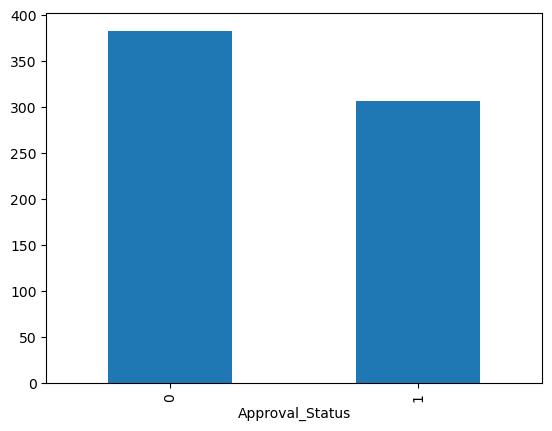

In [10]:
application_file['Approval_Status'].value_counts().plot(kind='bar')
print(application_file['Approval_Status'].value_counts())

In [11]:
application_file['Gender'] = application_file['Gender'].replace({'a': 'f', 'b': 'm'})

application_file['Gender'] = application_file['Gender'].replace({'f': 1, 'm': 0})

application_file = application_file.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

application_file.head(90)

,Gender,Age,Income,Marital_Status,number_of_children,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Ethinicity,zipcode,Loan,Approval_Status
0,0,58.670000,4.460,0,0,0,0,3.040,0,0,6,0,0,0,560,1
1,0,24.500000,0.500,0,0,0,0,1.500,0,1,0,0,0,1,824,1
2,1,27.830000,1.540,0,0,1,1,3.750,0,0,5,1,0,2,3,1
3,1,20.170000,5.625,0,0,1,1,1.710,0,1,0,0,1,3,0,1
4,1,32.080000,4.000,0,0,2,1,2.500,0,1,0,1,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,31.569261,0.375,0,0,7,1,0.875,0,1,0,1,1,44,0,0
86,1,25.670000,2.210,1,1,11,1,4.000,0,1,0,0,0,45,0,0
87,1,34.000000,4.500,0,0,11,1,1.000,0,1,0,1,0,23,0,0
88,0,49.000000,1.500,0,0,13,4,0.000,0,1,0,1,0,2,27,0


# Data Cleaning

<Axes: >

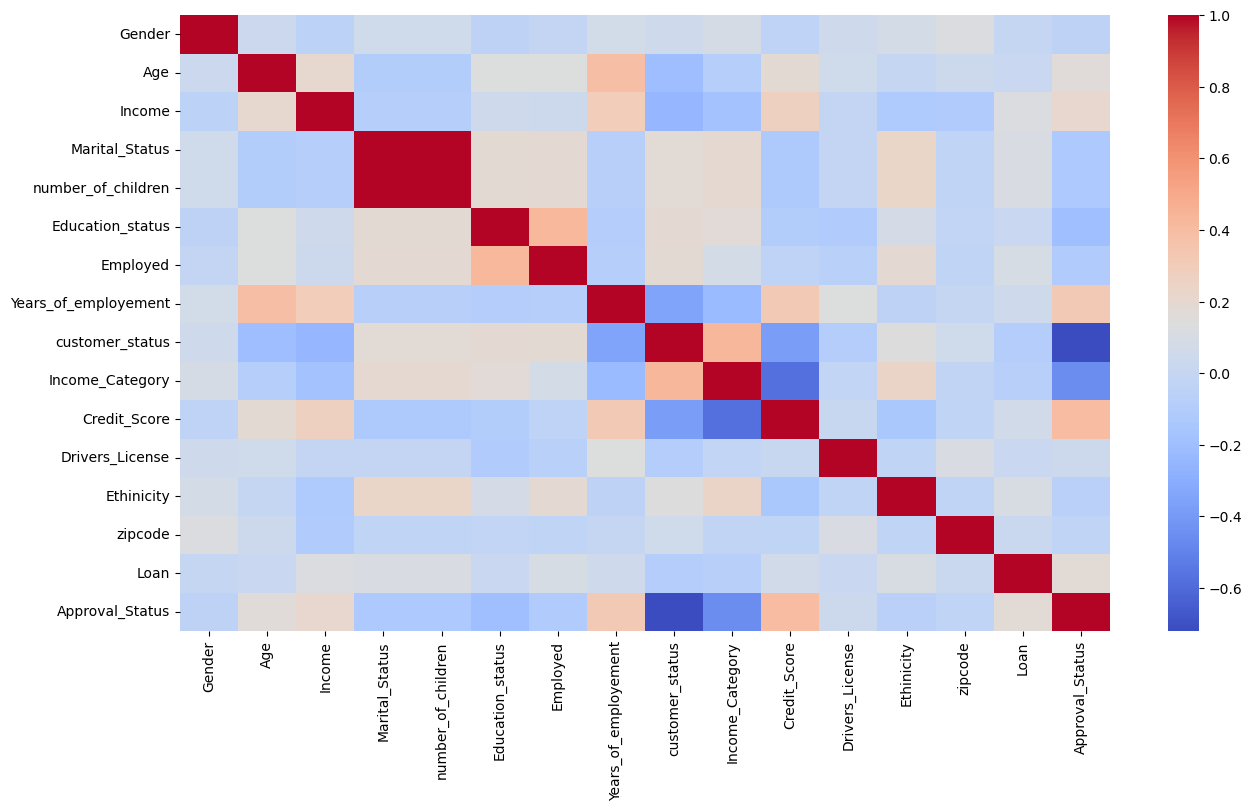

In [12]:
corr_matrix = application_file.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm')

In [13]:
application_file = application_file.drop(['zipcode','Ethinicity','Marital_Status','number_of_children'], axis = 1)

application_file.head(50)


,Gender,Age,Income,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Loan,Approval_Status
0,0,58.67,4.460,0,0,3.040,0,0,6,0,560,1
1,0,24.50,0.500,0,0,1.500,0,1,0,0,824,1
2,1,27.83,1.540,1,1,3.750,0,0,5,1,3,1
3,1,20.17,5.625,1,1,1.710,0,1,0,0,0,1
4,1,32.08,4.000,2,1,2.500,0,1,0,1,0,1
5,1,33.17,1.040,3,0,6.500,0,1,0,1,31285,1
6,0,22.92,11.585,4,1,0.040,0,1,0,0,1349,1
7,1,54.42,0.500,5,0,3.960,0,1,0,0,314,1
8,1,42.50,4.915,1,1,3.165,0,1,0,1,1442,1
9,1,22.08,0.830,6,0,2.165,1,1,0,1,0,1


In [14]:
attributes = application_file.drop(['Approval_Status'], axis = 1)

decider_column = application_file['Approval_Status']

train_data, test_data, train_decider_column, test_decider_column = train_test_split(attributes, decider_column, test_size=0.35)

training_set_length = len(train_data)
testing_set_length = len(test_data)
train_decider_column_length = len(train_decider_column)
test_decider_column_length = len(test_decider_column)

print("Training attributes length:", training_set_length)
print("Testing attributes length:", testing_set_length)
print("Training decider_column length:", train_decider_column_length)
print("Testing decider_column length:", test_decider_column_length)


Training attributes length: 447
Testing attributes length: 242
Training decider_column length: 447
Testing decider_column length: 242


In [15]:
train_data

,Gender,Age,Income,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Loan
56,1,44.33,0.500,9,0,5.000,0,1,0,1,0
40,1,28.92,15.000,6,0,5.335,0,0,11,0,2283
287,1,18.83,0.415,6,1,0.165,1,0,1,0,1
203,1,36.33,2.125,1,1,0.085,0,0,1,0,1187
470,1,21.08,4.125,9,0,0.040,1,1,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...
405,0,40.33,8.125,5,1,0.165,1,0,2,0,18
148,0,52.83,15.000,6,1,5.500,0,0,14,0,2200
524,1,45.17,1.500,6,1,2.500,0,1,0,1,0
513,1,22.67,2.540,6,0,2.585,0,1,0,0,0


In [16]:
test_data

,Gender,Age,Income,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Loan
264,1,17.08,0.085,6,1,0.040,1,1,0,0,722
199,0,24.08,0.500,0,0,1.250,0,0,1,0,678
580,1,41.00,0.040,10,1,0.040,1,0,1,0,0
252,1,23.17,11.125,8,0,0.460,0,0,1,0,0
525,1,41.58,1.750,5,1,0.210,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
435,1,19.58,0.585,12,3,0.000,1,0,3,0,769
66,1,25.50,0.375,2,1,0.250,0,0,3,0,15108
619,1,22.17,2.250,9,1,0.125,1,1,0,0,10
208,1,39.50,4.250,6,2,6.500,0,0,16,0,1210


# Logistic Regression

In [30]:
def evaluate_logistic_regression(train_data, train_decider_column, test_data, test_decider_column):
    
    logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

    logistic_model.fit(train_data, train_decider_column)

    prediction = logistic_model.predict(test_data)

    logistic_regression_accuracy = accuracy_score(test_decider_column, prediction)

    print(f"Accuracy for testing set: {logistic_regression_accuracy* 100:.2f}%")
    print("\nClassification Report:\n", classification_report(test_decider_column, 
                                                              prediction))
    print("Confusion Matrix:\n", confusion_matrix(test_decider_column, prediction))

    feature_importance = np.abs(logistic_model.coef_[0])
    feature_names = test_data.columns

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Feature Importance in Logistic Regression Model')
    plt.xlabel('Feature Names')
    plt.ylabel('Absolute Coefficient Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    return logistic_model, logistic_regression_accuracy

Accuracy for testing set: 84.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       132
           1       0.85      0.79      0.82       110

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242

Confusion Matrix:
 [[117  15]
 [ 23  87]]


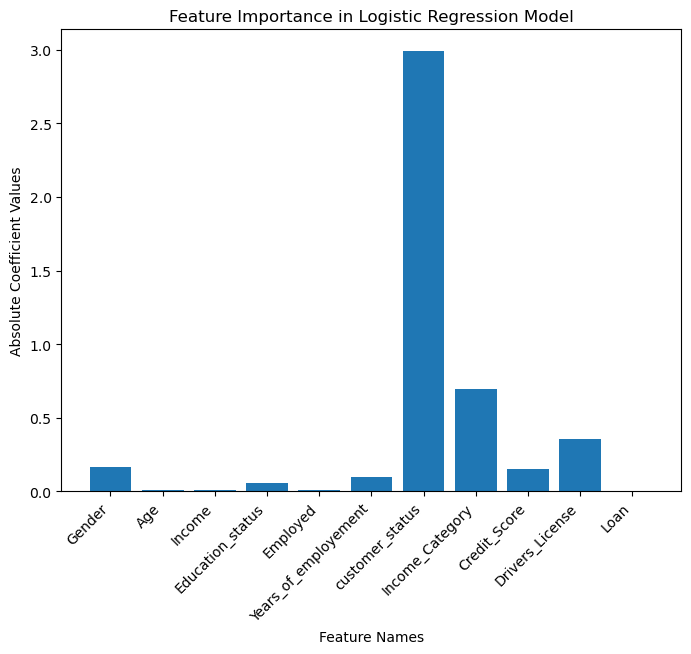

(LogisticRegression(max_iter=1000), 0.8429752066115702)

In [16]:
evaluate_logistic_regression(train_data, train_decider_column, test_data, 
                             test_decider_column)

# Decision Trees

In [31]:
def evaluate_decision_tree(train_data, train_decider_column, test_data, 
                           test_decider_column, max_depth):
    
    decision_trees = DecisionTreeClassifier(max_depth=max_depth)
    decision_trees.fit(train_data, train_decider_column)

    data_test_prediction = decision_trees.predict(test_data)
    decision_tree_test_accuracy = accuracy_score(data_test_prediction,test_decider_column)
    print(f"Accuracy for the Testing set: {decision_tree_test_accuracy * 100:.2f}%")
    print("\nClassification Report:\n", classification_report(test_decider_column,data_test_prediction))
    print("Confusion Matrix:\n", confusion_matrix(test_decider_column,data_test_prediction))
    
    feature_importance = decision_trees.feature_importances_
    feature_names = test_data.columns

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Feature Importance in Decision Tree Model')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=45, ha='right')
    plt.show()
  
    
    return  decision_trees, decision_tree_test_accuracy


Accuracy for the Testing set: 79.75%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       132
           1       0.83      0.70      0.76       110

    accuracy                           0.80       242
   macro avg       0.80      0.79      0.79       242
weighted avg       0.80      0.80      0.80       242

Confusion Matrix:
 [[116  16]
 [ 33  77]]


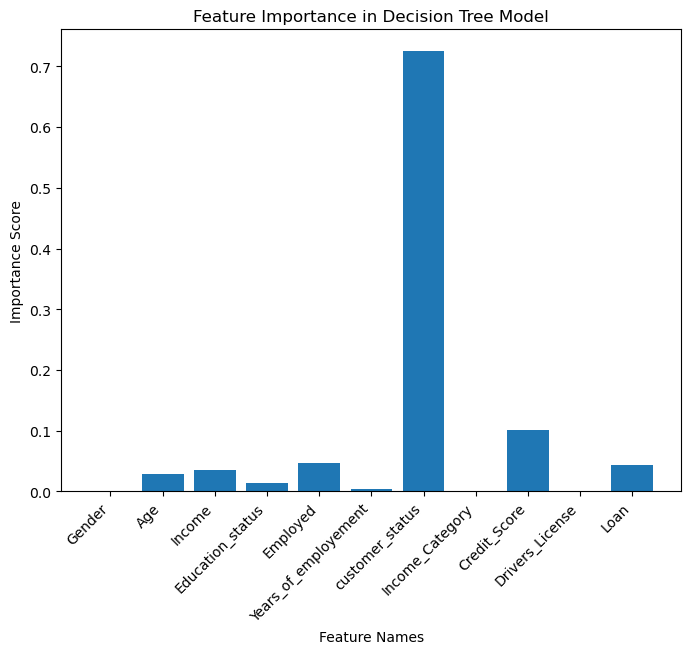

(DecisionTreeClassifier(max_depth=4), 0.7975206611570248)

In [18]:
evaluate_decision_tree(train_data, train_decider_column, test_data,test_decider_column, max_depth=4)


Accuracy for the Testing set: 77.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       132
           1       0.77      0.72      0.75       110

    accuracy                           0.78       242
   macro avg       0.78      0.77      0.77       242
weighted avg       0.78      0.78      0.78       242

Confusion Matrix:
 [[109  23]
 [ 31  79]]


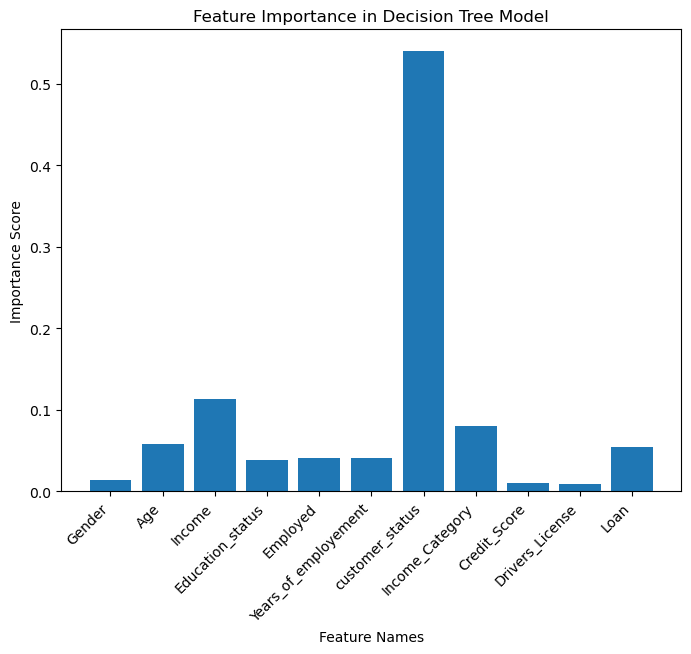

(DecisionTreeClassifier(max_depth=15), 0.7768595041322314)

In [19]:
evaluate_decision_tree(train_data, train_decider_column, test_data, test_decider_column, max_depth=15)

Accuracy for the Testing set: 80.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       132
           1       0.79      0.79      0.79       110

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242

Confusion Matrix:
 [[109  23]
 [ 23  87]]


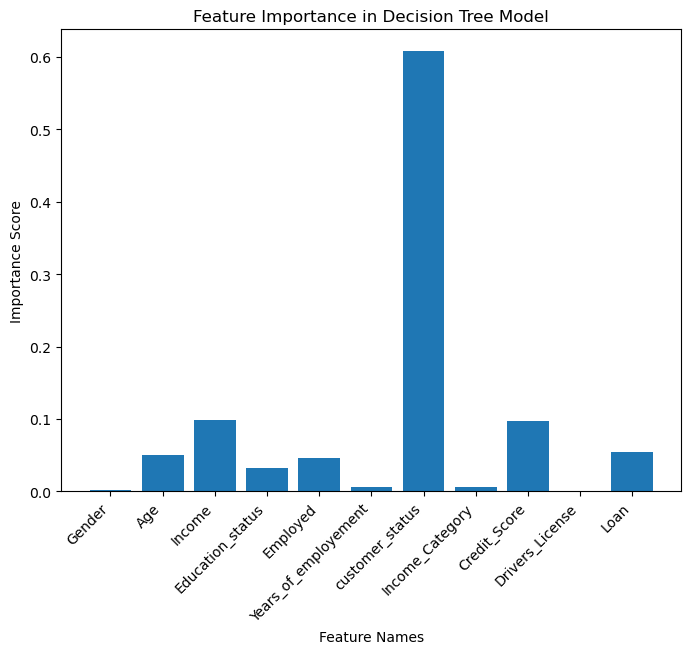

(DecisionTreeClassifier(max_depth=6), 0.8099173553719008)

In [20]:
evaluate_decision_tree(train_data, train_decider_column, test_data, test_decider_column, max_depth=6)

# SVM Classifier

In [32]:
def evaluate_svm(train_data, test_data, train_decider_column, test_decider_column, n_components, C, kernel):
    
    
    svm_model = SVC(C=C, kernel=kernel)
    svm_model.fit(train_data, train_decider_column)
    
    prediction_decider_column = svm_model.predict(test_data)
    svm_accuracy = accuracy_score(test_decider_column, prediction_decider_column)
    
    print(f"Accuracy for the Testing set: {svm_accuracy * 100:.2f}%")
    print(f"Classification Report (C={C}, kernel='{kernel}'):")
    print(classification_report(test_decider_column, prediction_decider_column))
    print("Confusion Matrix:")
    print(confusion_matrix(test_decider_column, prediction_decider_column))
    print("\n")
    
    if kernel == 'linear':
        feature_importance = np.abs(svm_model.coef_.flatten())
        feature_names = train_data.columns
        
        plt.figure(figsize=(12, 6))
        plt.bar(feature_names, feature_importance)
        plt.title('Feature Importance in Linear SVM Model')
        plt.xlabel('Feature Names')
        plt.ylabel('Coefficient Magnitude')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif kernel == 'rbf':
        result = permutation_importance(svm_model, test_data, test_decider_column, 
                                        n_repeats=10, random_state=42)
        feature_importance = result.importances_mean
        feature_names = test_data.columns

        plt.figure(figsize=(8, 6))
        plt.bar(feature_names, feature_importance)
        plt.title('Feature Importance in rbf SVM Model')
        plt.xlabel('Feature Names')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45, ha='right')
        plt.show()

    return svm_model, svm_accuracy

Accuracy for the Testing set: 84.71%
Classification Report (C=0.1, kernel='linear'):
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       132
           1       0.79      0.91      0.84       110

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.85      0.85       242

Confusion Matrix:
[[105  27]
 [ 10 100]]




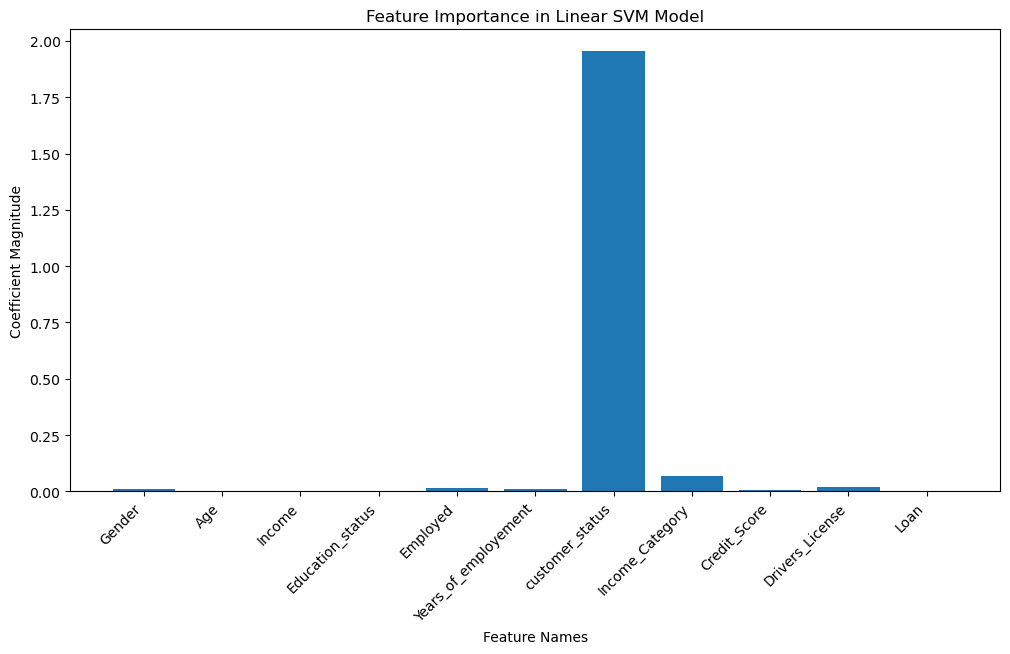

(SVC(C=0.1, kernel='linear'), 0.8471074380165289)

In [22]:
evaluate_svm(train_data, test_data, train_decider_column, test_decider_column,n_components=4, C=0.1, kernel='linear')

Accuracy for the Testing set: 61.98%
Classification Report (C=0.1, kernel='rbf'):
              precision    recall  f1-score   support

           0       0.59      0.97      0.74       132
           1       0.85      0.20      0.32       110

    accuracy                           0.62       242
   macro avg       0.72      0.58      0.53       242
weighted avg       0.71      0.62      0.55       242

Confusion Matrix:
[[128   4]
 [ 88  22]]




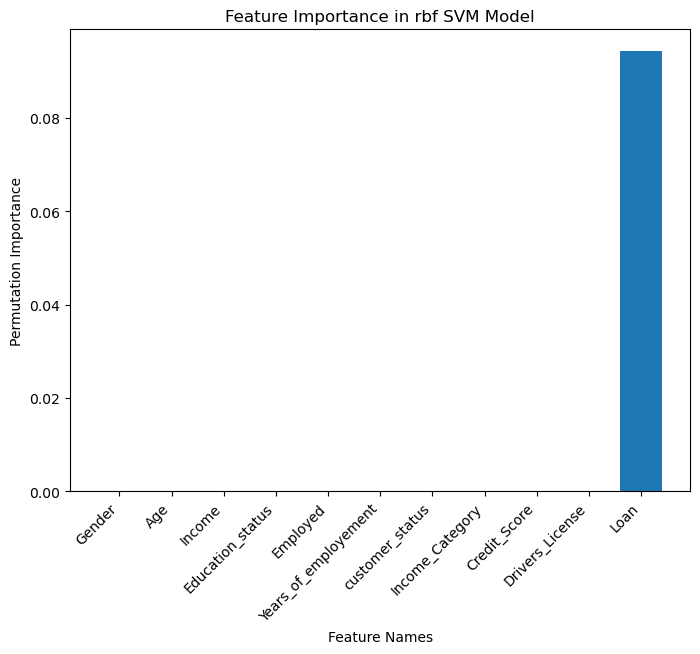

(SVC(C=0.1), 0.6198347107438017)

In [23]:
evaluate_svm(train_data, test_data, train_decider_column, test_decider_column,n_components=4, C=0.1, kernel='rbf')

# Perceptron

In [25]:
def evaluate_perceptron(train_vectors, train_labels, test_vectors, test_labels):
        
    perceptron_model = Perceptron()    
    perceptron_model.fit(train_data, train_decider_column)    
    prediction_percep = perceptron_model.predict(test_data)
    
    perceptron_accuracy = accuracy_score(test_decider_column, prediction_percep)
    
    
    print(f"Accuracy for the Testing set: {perceptron_accuracy * 100:.2f}%")
    print("Classification report:")
    print(classification_report(test_decider_column, prediction_percep))
    
    print('Confusion matrix:')
    print(confusion_matrix(test_decider_column, prediction_percep))
    
    feature_importance = np.abs(perceptron_model.coef_.flatten())
    feature_names = test_data.columns

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Feature Importance in Perceptron Model')
    plt.xlabel('Feature Names')
    plt.ylabel('Coefficient Magnitude')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    
    return perceptron_model, perceptron_accuracy



Accuracy for the Testing set: 64.46%
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       138
           1       0.60      0.52      0.56       104

    accuracy                           0.64       242
   macro avg       0.64      0.63      0.63       242
weighted avg       0.64      0.64      0.64       242

Confusion matrix:
[[102  36]
 [ 50  54]]


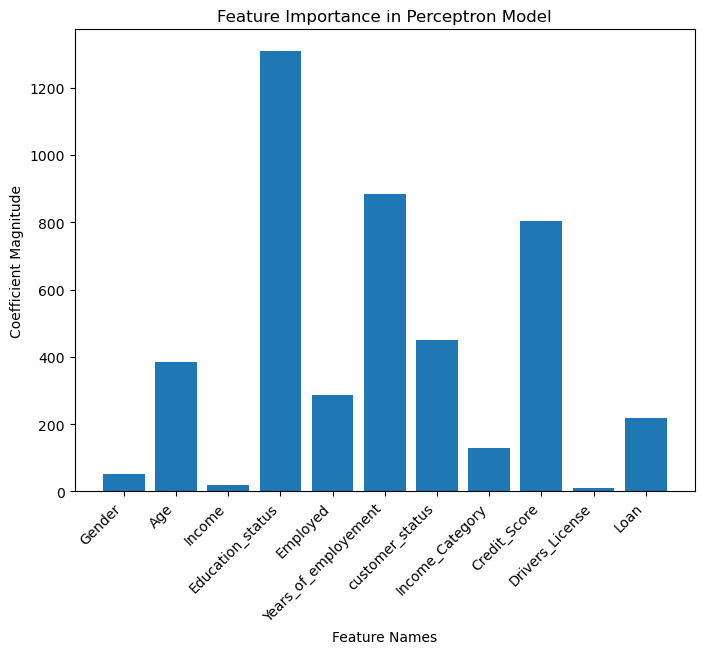

(Perceptron(), 0.6446280991735537)

In [26]:
evaluate_perceptron(train_data, train_decider_column, test_data, test_decider_column)


In [27]:
accuracies = []

def plot_accuracy(model_name, accuracy):
    accuracies.append((model_name, accuracy))
    
    model_names = [name for name, _ in accuracies]
    accuracy_scores = [score for _, score in accuracies]
    
    print("Accuracy scores:", accuracy_scores)


Accuracy for testing set: 83.47%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       138
           1       0.80      0.82      0.81       104

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242

Confusion Matrix:
 [[117  21]
 [ 19  85]]


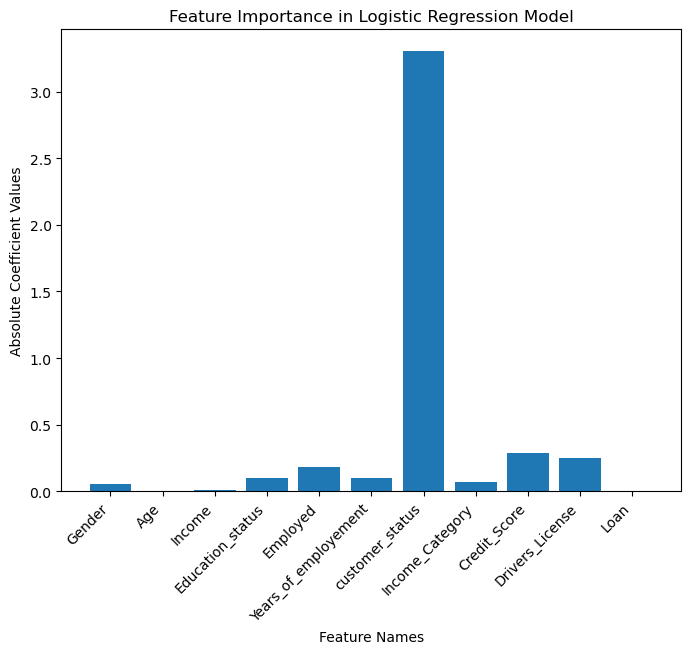

Accuracy for the Testing set: 81.40%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       138
           1       0.82      0.72      0.77       104

    accuracy                           0.81       242
   macro avg       0.82      0.80      0.81       242
weighted avg       0.81      0.81      0.81       242

Confusion Matrix:
 [[122  16]
 [ 29  75]]


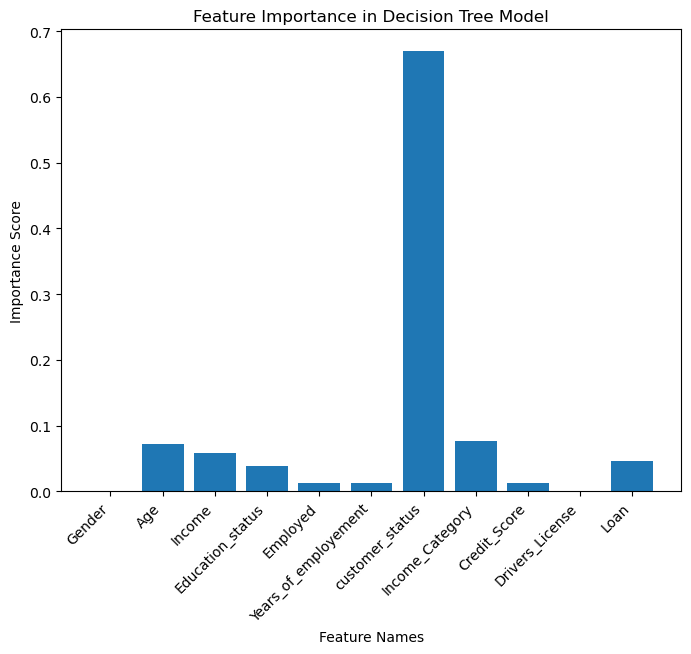

Accuracy for the Testing set: 84.71%
Classification Report (C=0.1, kernel='linear'):
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       138
           1       0.79      0.88      0.83       104

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242

Confusion Matrix:
[[113  25]
 [ 12  92]]




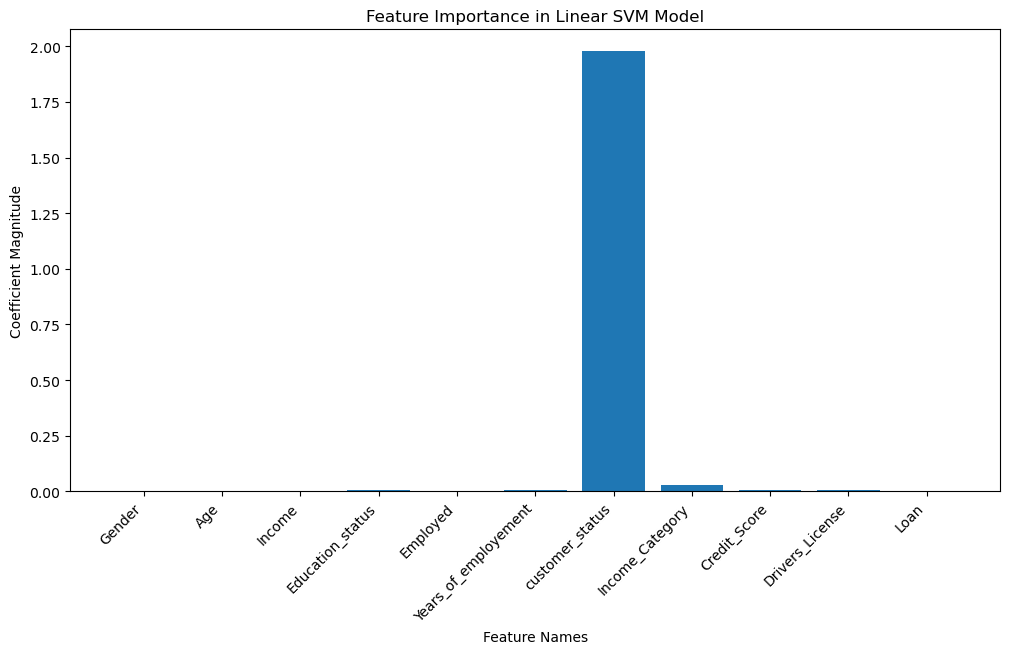

Accuracy for the Testing set: 64.46%
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       138
           1       0.60      0.52      0.56       104

    accuracy                           0.64       242
   macro avg       0.64      0.63      0.63       242
weighted avg       0.64      0.64      0.64       242

Confusion matrix:
[[102  36]
 [ 50  54]]


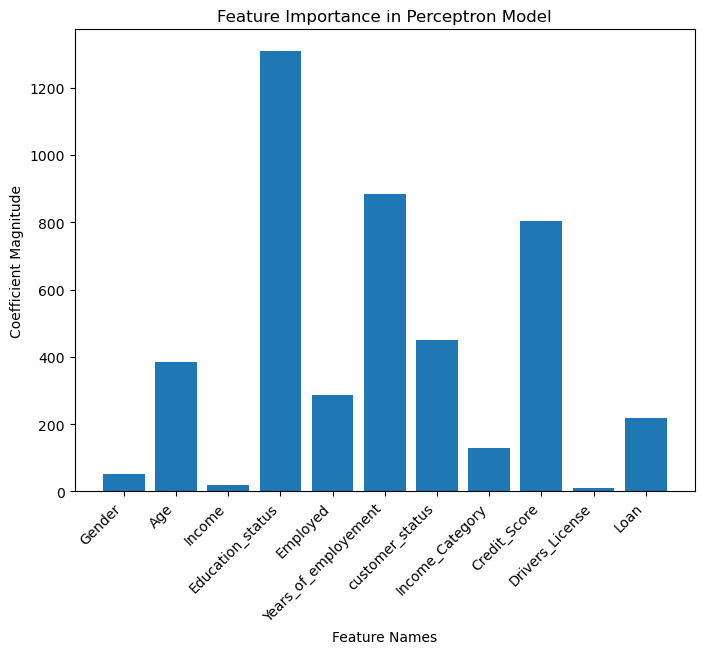

In [33]:
logistic_model, logistic_regression_accuracy = evaluate_logistic_regression(train_data, train_decider_column, test_data, test_decider_column)

decision_trees, decision_tree_accuracy = evaluate_decision_tree(train_data, train_decider_column, test_data, test_decider_column, max_depth=6)

svm_model, svm_accuracy = evaluate_svm(train_data, test_data, train_decider_column, test_decider_column, n_components=4, C=0.1, kernel='linear')

perceptron_model, perceptron_accuracy = evaluate_perceptron(train_data, train_decider_column, test_data, test_decider_column)

# Line Graph Comparisons

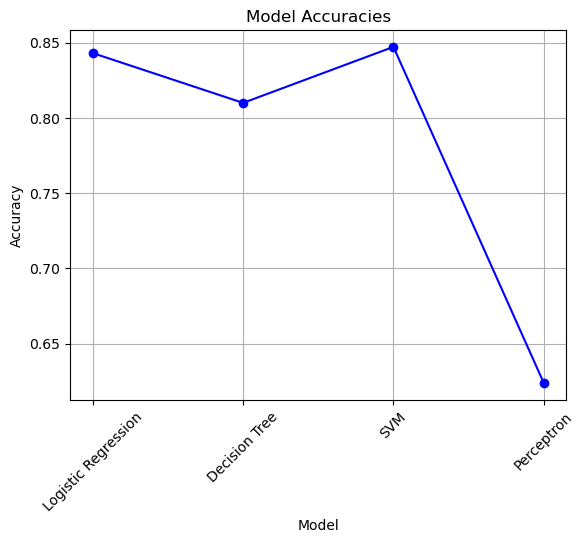

In [34]:
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'Perceptron']
accuracy_values = [logistic_regression_accuracy, decision_tree_accuracy, svm_accuracy, perceptron_accuracy]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45);
plt.grid(True)
plt.show()

# Combined Model Accuracies

# Logistic Regression & Decision Tree Classifiers

In [37]:
vc_1 = VotingClassifier(estimators=[('lr', logistic_model), ('dt', decision_trees)], voting='hard')
vc_1.fit(train_data, train_decider_column)

y_pred_1 = vc_1.predict(test_data)
combined_accuracy_1 = accuracy_score(test_decider_column, y_pred_1)

print(f'Combined Accuracy of Logistic Regression & Decision Tree Classifiers : {combined_accuracy_1 *100:.2f}%')


Combined Accuracy of Logistic Regression & Decision Tree Classifiers : 82.64%


# Logistic Regression & SVM Classifier

In [38]:
vc_2 = VotingClassifier(estimators=[('lr', logistic_model), ('svm', svm_model)], voting='hard')
vc_2.fit(train_data, train_decider_column)

y_pred_2 = vc_2.predict(test_data)
combined_accuracy_2 = accuracy_score(test_decider_column, y_pred_2)

print(f'Combined Accuracy of Logistic Regression & SVM Classifier: {combined_accuracy_2*100:.2f}%')


Combined Accuracy of Logistic Regression & SVM Classifier: 84.30%


# Logistic Regression & Perceptron Classifier

In [48]:
vc_3 = VotingClassifier(estimators=[('lr', logistic_model), ('perceptron', perceptron_model)], voting='hard')
vc_3.fit(train_data, train_decider_column)

y_pred_3 = vc_3.predict(test_data)
combined_accuracy_3 = accuracy_score(test_decider_column, y_pred_3)

print(f'Combined Accuracy of Logistic Regression & Perceptron Classifier: {combined_accuracy_3 *100:.2f}%')


Combined Accuracy of Logistic Regression & Perceptron Classifier: 75.62%


# Decision Tree & SVM Classifier

In [40]:
vc_4 = VotingClassifier(estimators=[('dt', decision_trees), ('svm', svm_model)], voting='hard')
vc_4.fit(train_data, train_decider_column)

y_pred_4 = vc_4.predict(test_data)
combined_accuracy_4 = accuracy_score(test_decider_column, y_pred_4)

print(f'Combined Accuracy of Decision Tree & SVM Classifier: {combined_accuracy_4 *100:.2f}%')


Combined Accuracy of Decision Tree & SVM Classifier: 83.06%


# Decision Tree & Perceptron Classifier

In [41]:
vc_5 = VotingClassifier(estimators=[('dt', decision_trees), ('perceptron', perceptron_model)], voting='hard')
vc_5.fit(train_data, train_decider_column)

y_pred_5 = vc_5.predict(test_data)
combined_accuracy_5 = accuracy_score(test_decider_column, y_pred_5)

print(f'Combined Accuracy of Decision Tree & Perceptron Classifier: {combined_accuracy_5 *100:.2f}%')


Combined Accuracy of Decision Tree & Perceptron Classifier: 73.97%


# SVM & Perceptron Classifier

In [42]:
vc_6 = VotingClassifier(estimators=[('svm', svm_model), ('perceptron', perceptron_model)], voting='hard')
vc_6.fit(train_data, train_decider_column)

y_pred_6 = vc_6.predict(test_data)
combined_accuracy_6 = accuracy_score(test_decider_column, y_pred_6)

print(f'Combined Accuracy of SVM & Perceptron Classifier: {combined_accuracy_6 *100:.2f}%')

Combined Accuracy of SVM & Perceptron Classifier: 76.03%


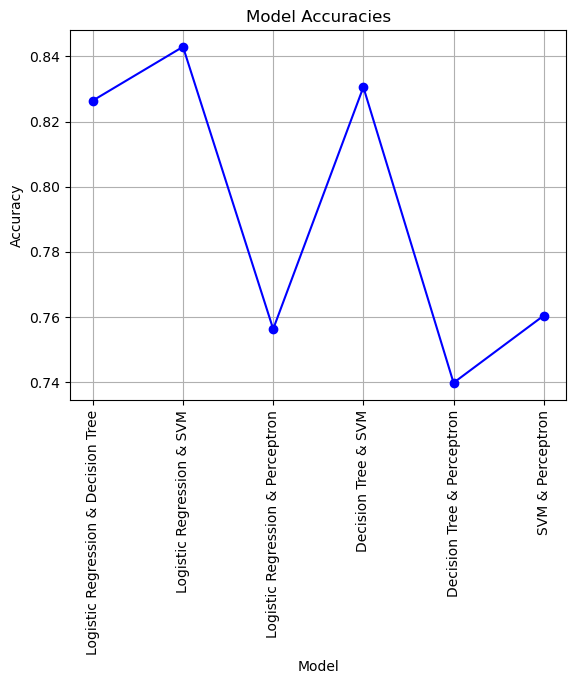

In [43]:
model_names = ['Logistic Regression & Decision Tree', 'Logistic Regression & SVM', 'Logistic Regression & Perceptron', 'Decision Tree & SVM', 'Decision Tree & Perceptron','SVM & Perceptron']
accuracy_values = [combined_accuracy_1, combined_accuracy_2, combined_accuracy_3, combined_accuracy_4, combined_accuracy_5, combined_accuracy_6]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

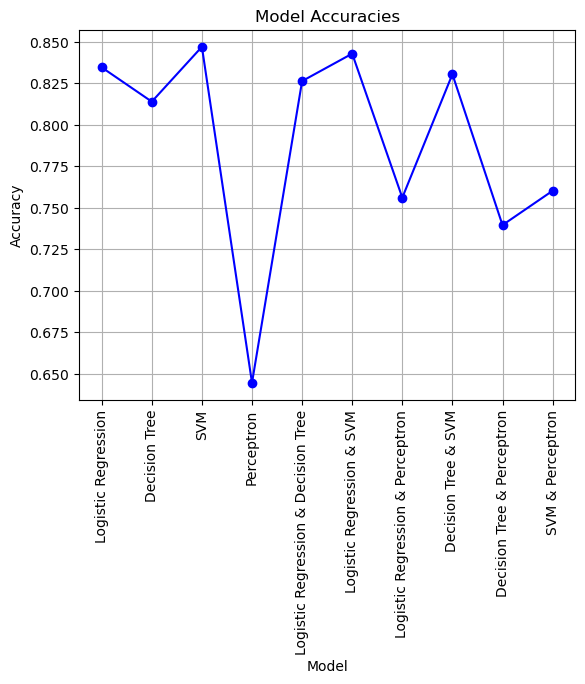

In [44]:
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'Perceptron','Logistic Regression & Decision Tree', 'Logistic Regression & SVM', 'Logistic Regression & Perceptron', 'Decision Tree & SVM', 'Decision Tree & Perceptron','SVM & Perceptron']
accuracy_values = [logistic_regression_accuracy, decision_tree_accuracy, svm_accuracy, perceptron_accuracy, combined_accuracy_1, combined_accuracy_2, combined_accuracy_3, combined_accuracy_4, combined_accuracy_5, combined_accuracy_6]

plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# References:

# Dataset:
https://archive.ics.uci.edu/ml/datasets/credit+approval

# Linear Regression:

https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Decision Tree Classification:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# Support Vector Machine (SVM) Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# Perceptron:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# Voting Classifier

https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/
